# Conceptos básicos de estadística para la modelización predictiva

## Coeficiente de Correlación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# x: "Gastos diarios en un determinado periodo" (millones)
data_ads = pd.read_csv('../python-ml-course-master/datasets/ads/Advertising.csv')

In [35]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
data_ads.shape

(200, 4)

In [37]:
# Formula de Coeficiente de correlación de Pearson
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [38]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [39]:
data_ads["corrTV"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [40]:
data_ads["corrSa"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [41]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corrTV,corrSa
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [42]:
corrn = sum(data_ads["corrn"]) / np.sqrt(sum(data_ads["corrTV"]) * sum(data_ads["corrSa"]))

In [43]:
corrn

0.782224424861606

In [44]:
def corr_coef(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var2])) * (df[var2] - np.mean(df[var2]))
    df["corrTV"] = (df[var1] - np.mean(df[var1]))**2
    df["corrSa"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"]) / np.sqrt(sum(df["corrTV"]) * sum(df["corrSa"]))
    return corr_p

In [45]:
corr_coef(data_ads, "TV", "Sales")

0.7822244248616051

In [54]:
data_ads = pd.read_csv('python-ml-course-master/datasets/ads/Advertising.csv')

In [55]:
cols = data_ads.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [56]:
for x in cols:
    for y in cols:
        print(x + ", " + y + " : " + str(corr_coef(data_ads, x, y)))

TV, TV : 1.0
TV, Radio : 0.054808664465827765
TV, Newspaper : 0.0566478749650574
TV, Sales : 0.7822244248616051
Radio, TV : 0.05480866446582909
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611751
Radio, Sales : 0.5762225745710552
Newspaper, TV : 0.056647874965056466
Newspaper, Radio : 0.3541037507611747
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616475
Sales, TV : 0.7822244248616039
Sales, Radio : 0.5762225745710584
Sales, Newspaper : 0.22829902637616453
Sales, Sales : 1.0


Text(0.5, 1.0, 'Gastos en TV vs Ventas del producto')

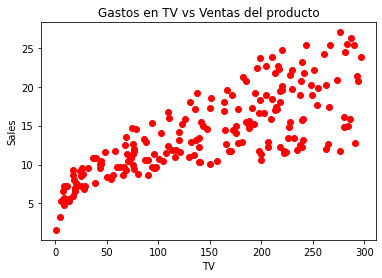

In [57]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Gastos en TV vs Ventas del producto")

Text(0.5, 1.0, 'Gastos en Radio vs Ventas del producto')

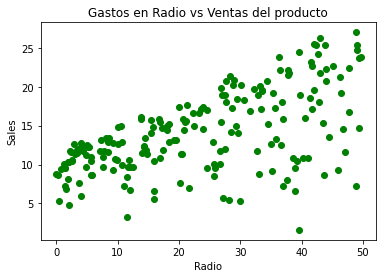

In [58]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Gastos en Radio vs Ventas del producto")

Text(0.5, 1.0, 'Gastos en Periodico vs Ventas del producto')

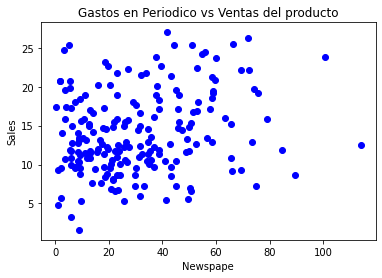

In [59]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.xlabel("Newspape")
plt.ylabel("Sales")
plt.title("Gastos en Periodico vs Ventas del producto")

In [61]:
data_ads = pd.read_csv('python-ml-course-master/datasets/ads/Advertising.csv')
# Funcion de correlacion definida
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


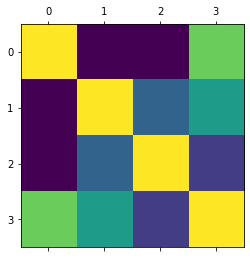

In [62]:
plt.matshow(data_ads.corr())